In [ ]:
# pip install statsmodels tensorflow pandas scikit-learn yfinance

In [ ]:
# pip install tensorflow

In [ ]:
# pip install matplotlib



In [ ]:
# import yfinance as yf
# import pandas as pd

# def download_nasdaq100_data(start_date, end_date):

#   # Download the NASDAQ 100 index data
#   nasdaq100 = yf.download("^NDX", start=start_date, end=end_date)

#   return nasdaq100

# if __name__ == "__main__":
#   start_date = "2020-01-01"
#   end_date = "2024-01-01"
#   nasdaq100_data = download_nasdaq100_data(start_date, end_date)
#   nasdaq100_data.to_csv("nasdaq100_data.csv")


# LSTM model


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# start_date,end_date
start_date = '2022-10-02'
end_date = '2023-0601'

# Load the dataset
data = pd.read_csv('data/nasdaq100_data.csv')

# Convert date column to datetime (assuming a column named 'Date')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data_filtered = data.loc[start_date:end_date]

# Extract the prices (assuming a column named 'Price')
actual_prices = data_filtered['Close'].values.reshape(-1, 1)

# Scale the prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(actual_prices)

# Define a function to create the dataset
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time steps
time_step = 1
X, y = create_dataset(scaled_prices, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, batch_size=1, epochs=5)

# Predicting future prices
lstm_predictions = model.predict(X)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data_filtered.index, actual_prices, label='Actual Prices', color='blue')
plt.plot(data_filtered.index[time_step+1:], lstm_predictions, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Actual Prices vs Predicted Prices')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Ensure both arrays have the same length
min_length = min(len(actual_prices), len(lstm_predictions))
actual_prices = actual_prices[:min_length]
lstm_predictions = lstm_predictions[:min_length]

# Calculate and print the Mean Squared Error
mse = mean_squared_error(actual_prices, lstm_predictions)
print(f"Mean Squared Error: {mse}")

# Ensure the lengths match
min_length = min(len(lstm_predictions), len(actual_prices))
lstm_predictions = lstm_predictions[:min_length]
actual_prices = actual_prices[:min_length]
# Calculate RMSE
rmse = np.sqrt(np.mean((lstm_predictions - actual_prices) ** 2))
print(f'Root Mean Squared Error: {rmse}')


# RandomForest


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# start_date,end_date
start_date = '2022-01-02'
end_date = '2023-06-01'

# Load the dataset
data = pd.read_csv('data/nasdaq100_data.csv')


# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data_filtered = data.loc[:end_date]

# Extract the prices (assuming a column named 'Close')
actual_prices = data_filtered['Close'].values.reshape(-1, 1)

# Scale the prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(actual_prices)

# Define a function to create the dataset
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time steps
time_step = 1
X, y = create_dataset(scaled_prices, time_step)

# No need to reshape X for RandomForest, keep it flat
# Train/Test split (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create and train the RandomForest model
model = RandomForestRegressor(n_estimators=200)
model.fit(X_train, y_train)

# Predicting on test data
rf_predictions = model.predict(X_test)
rf_predictions = rf_predictions.reshape(-1, 1)
rf_predictions = scaler.inverse_transform(rf_predictions)

# Rescale actual y_test data
actual_prices = y_test.reshape(-1, 1)
actual_prices = scaler.inverse_transform(actual_prices)

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data_filtered.index[-len(actual_prices):], actual_prices, label='Actual Prices', color='blue')
plt.plot(data_filtered.index[-len(rf_predictions):], rf_predictions, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Actual Prices vs Predicted Prices (Random Forest)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Ensure both arrays have the same length
min_length = min(len(actual_prices), len(rf_predictions))
actual_prices = actual_prices[:min_length]
rf_predictions = rf_predictions[:min_length]

# Calculate and print the Mean Squared Error
mse = mean_squared_error(actual_prices, rf_predictions)
print(f"Mean Squared Error: {mse}")

# Ensure the lengths match
min_length = min(len(rf_predictions), len(actual_prices))
rf_predictions = rf_predictions[:min_length]
actual_prices = actual_prices[:min_length]
# Calculate RMSE
rmse = np.sqrt(np.mean((rf_predictions - actual_prices) ** 2))
print(f'Root Mean Squared Error: {rmse}')

# XGBoost model

In [ ]:
!pip install xgboost


C:\Users\wibun\AppData\Local\Temp\ipykernel_60436\2354949631.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Lag1'] = data_filtered['Close'].shift(1)
C:\Users\wibun\AppData\Local\Temp\ipykernel_60436\2354949631.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Close_Lag2'] = data_filtered['Close'].shift(2)
C:\Users\wibun\AppData\Local\Temp\ipykernel_60436\2354949631.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


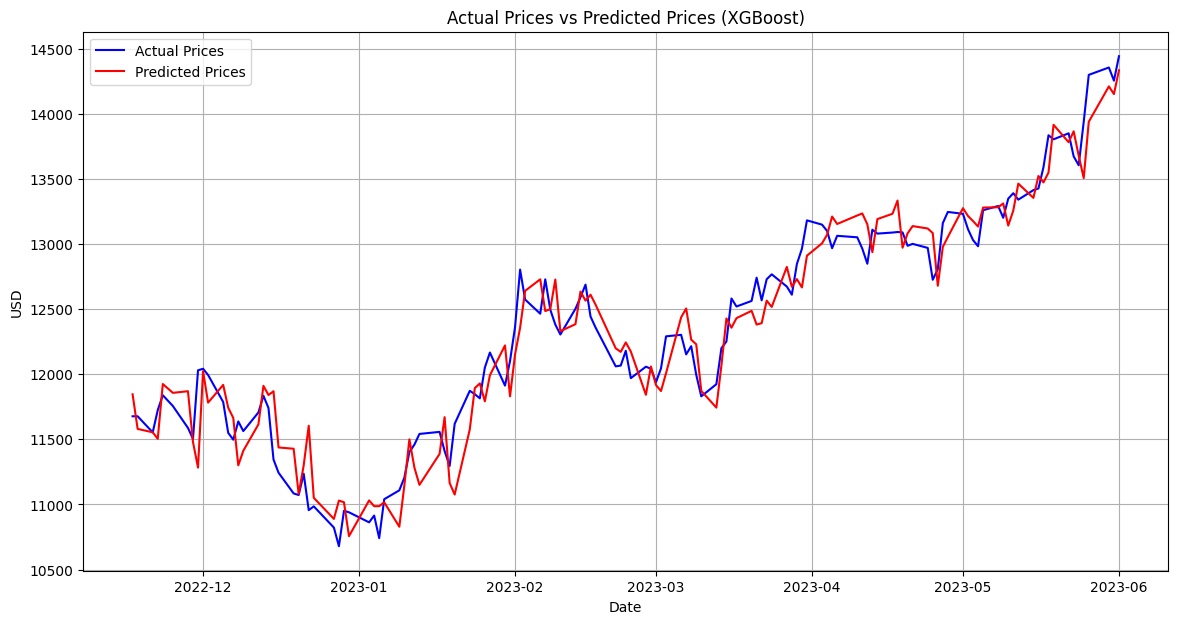

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('data/nasdaq100_data.csv')

# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Filter data to the specified end date
start_date = '2020-10-02'
end_date = '2023-06-01'
data_filtered = data.loc[start_date:end_date]

# Extract the prices and create lag features
data_filtered['Close_Lag1'] = data_filtered['Close'].shift(1)
data_filtered['Close_Lag2'] = data_filtered['Close'].shift(2)
data_filtered['Close_Lag3'] = data_filtered['Close'].shift(3)

# Drop NaN values from lag features
data_filtered.dropna(inplace=True)

# Features and target variable
X = data_filtered[['Close_Lag1', 'Close_Lag2', 'Close_Lag3']]
y = data_filtered['Close']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Create and train the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=5)
model.fit(X_train, y_train)

# Predicting on test data
predictions = model.predict(X_test)



# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data_filtered.index[-len(y_test):], y_test, label='Actual Prices', color='blue')
plt.plot(data_filtered.index[-len(predictions):], predictions, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Actual Prices vs Predicted Prices (XGBoost)')
plt.grid(True)
plt.legend()
plt.show()


In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# สมมุติว่า 'actual_prices' คือราคาจริงและ 'predicted_prices' คือราคาที่โมเดลทำนาย
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Squared Error: 38693.074462307035
Root Mean Squared Error (RMSE): 196.70555269820684


# ARIMA model


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

# Load the dataset
data = pd.read_csv('data/nasdaq100_data.csv')

# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Filter data to the specified end date
start_date = '2022-01-02'
end_date = '2023-06-01'
data_filtered = data.loc[start_date:end_date]

# Extract the prices (assuming a column named 'Close')
prices = data_filtered['Close'].values

# Check stationarity using the Augmented Dickey-Fuller test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("The data is stationary")
    else:
        print("The data is not stationary; consider differencing.")

check_stationarity(prices)

# Train/Test split (80% train, 20% test)
train_size = int(len(prices) * 0.8)
train_data, test_data = prices[:train_size], prices[train_size:]

# Determine ARIMA order manually (this can be adjusted based on ACF, PACF analysis)
# You can start with (p=5, d=1, q=0) and refine based on performance.
p = 5
d = 1
q = 0

# Fit the ARIMA model
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

# Forecast for the test period
forecast = model_fit.forecast(steps=len(test_data))

# Calculate the Mean Squared Error
mse = mean_squared_error(test_data, forecast)
print(f"Mean Squared Error: {mse}")

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(data_filtered.index[-len(test_data):], test_data, label='Actual Prices', color='blue')
plt.plot(data_filtered.index[-len(forecast):], forecast, label='Predicted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('USD')
plt.title('Actual Prices vs Predicted Prices (ARIMA)')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# โหลดข้อมูล OHLC
data = pd.read_csv('data/nasdaq100_data.csv', parse_dates=['Date'])
data = data.dropna()
data.set_index('Date', inplace=True)

# Display the first few rows and general info about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head

In [ ]:
import matplotlib.pyplot as plt


# Plot the Close price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.title('NASDAQ 100 Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Use only 'Close' price for simplicity in this analysis
close_prices = data['Close'].values.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Function to create a dataset with look_back days
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create datasets for training and testing
look_back = 1  # Number of previous days to consider for predicting the next day
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


In [ ]:
# Lengths of training and testing sets
n_train = len(train_data)
n_test = len(test_data)

# Maximum look_back value that can be used
max_look_back = min(n_train, n_test) - 1
max_look_back


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# If you don't have Keras installed, you can install it using:
# pip install keras
look_back = 200  # This is the number of previous days to consider for predicting the next day's price
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
model.fit(X_train, y_train, batch_size=1, epochs=1)


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Reverse the scaling to get the actual price


In [ ]:
# Creating a DataFrame for the predictions with the same index as the test data
predictions_df = pd.DataFrame(predictions, index=data.index[train_size + look_back + 1:], columns=['Predictions'])

# Combine the actual and predicted prices into one DataFrame
combined_df = pd.concat([data[['Close']], predictions_df], axis=1)

# Plot the results
plt.figure(figsize=(16,8))
plt.title('Model Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(combined_df['Close'], label='Actual Price')
plt.plot(combined_df['Predictions'], label='Predicted Price')
plt.legend()
plt.show()


In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
print(f'Root Mean Squared Error: {rmse}')
